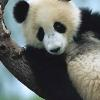

In [4]:
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

import tensorflow as tf

MODEL_DIR = "../../tmp/imagenet/"

image = os.path.join(MODEL_DIR, 'cropped_panda.jpg')

display(Image(image))

In [5]:
def create_graph():
  """Creates a graph from saved GraphDef file and returns a saver."""
  # Creates graph from saved graph_def.pb.
  with tf.gfile.FastGFile(os.path.join(
      MODEL_DIR, 'classify_image_graph_def.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

create_graph()

In [11]:
with tf.Session() as sess:
    tensor_param = sess.graph.get_tensor_by_name('conv/conv2d_params:0')
    _ = sess.run(tensor_param)
    print(_[:,:,:,15])

[[[ 0.50504398  0.63588464  0.29835746]
  [ 0.17330708  0.12650244  0.14368619]
  [-0.65657198 -0.81724554 -0.38719007]]

 [[ 0.62418926  0.76585162  0.34903738]
  [ 0.07726436  0.05995356  0.09628339]
  [-0.85024583 -0.96480691 -0.50737208]]

 [[ 0.13164113  0.15118749 -0.01220882]
  [ 0.02298364 -0.01118473 -0.0186027 ]
  [ 0.00497579  0.01391865  0.02939422]]]


In [46]:
def showImage(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1) * 255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data = f.getvalue()))
    
def visstd(a, s=0.1):
    '''Normalize the image range for visualization'''
    return (a - a.mean()) / max(a.std(), 1e-4) * s + 0.5

In [52]:
image_data = tf.gfile.FastGFile(image, 'rb').read()
with tf.Session() as sess:
    tensor_jpeg = sess.graph.get_tensor_by_name('Mul:0')
    print(tensor_jpeg)
    _ = sess.run(tensor_jpeg, {'DecodeJpeg/contents:0': image_data})
    
    print(_)
    
    #for i in range(32):
        #showImage(visstd(_[0, :, :, i]))
    

Tensor("Mul:0", shape=(1, 299, 299, 3), dtype=float32)
[[[[-0.4296875  -0.4375     -0.46875   ]
   [-0.42446172 -0.4270485  -0.46091139]
   [-0.419236   -0.41659701 -0.45307273]
   ..., 
   [ 0.37505221  0.61723971  0.78130221]
   [ 0.375       0.6171875   0.78125   ]
   [ 0.375       0.6171875   0.78125   ]]

  [[-0.37481707 -0.38262957 -0.41387957]
   [-0.37396067 -0.37829518 -0.41128421]
   [-0.37310433 -0.37396079 -0.40868878]
   ..., 
   [ 0.38026929  0.62245679  0.78651929]
   [ 0.38022578  0.62241328  0.78647578]
   [ 0.38022578  0.62241328  0.78647578]]

  [[-0.31994671 -0.32775921 -0.35900921]
   [-0.32345963 -0.32954186 -0.36165702]
   [-0.32697266 -0.33132464 -0.36430484]
   ..., 
   [ 0.38548625  0.62767375  0.79173625]
   [ 0.38545156  0.62763906  0.79170156]
   [ 0.38545156  0.62763906  0.79170156]]

  ..., 
  [[-0.26559889  0.07815111 -0.11716139]
   [-0.262986    0.08076394 -0.1145485 ]
   [-0.26037312  0.08337688 -0.11193562]
   ..., 
   [-0.14067686 -0.19536436 -0.398